In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/combined_data_1.txt',header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])
df.head()

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0


In [6]:
df.tail()

,Cust_Id,Rating
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0
24058262,1704416,3.0


In [7]:
df.dtypes

Cust_Id     object
Rating     float64
dtype: object

In [8]:
#to find the null values in the whole data set
df.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [9]:
df.shape

(24058263, 2)

In [10]:
#get the customer count with Nan values
movie_count =df.isnull().sum()
movie_count= movie_count["Rating"]

In [11]:
movie_count

4499

In [12]:
#to find the no of customers in the dataset
customer_count = df['Cust_Id'].nunique()
customer_count

475257

In [13]:
#without Nan values
customer_count=customer_count-movie_count
customer_count

470758

In [14]:
#to get the total no of ratings given by the customers
rating_count=df['Cust_Id'].count()-movie_count
rating_count

24053764

In [15]:
#to find out how many people have rated the movies as 1,2,3,4,5 stars ratings to the movies
stars = df.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


In [16]:
df['Rating'].value_counts()

Rating
4.0    8085741
3.0    6904181
5.0    5506583
2.0    2439073
1.0    1118186
Name: count, dtype: int64

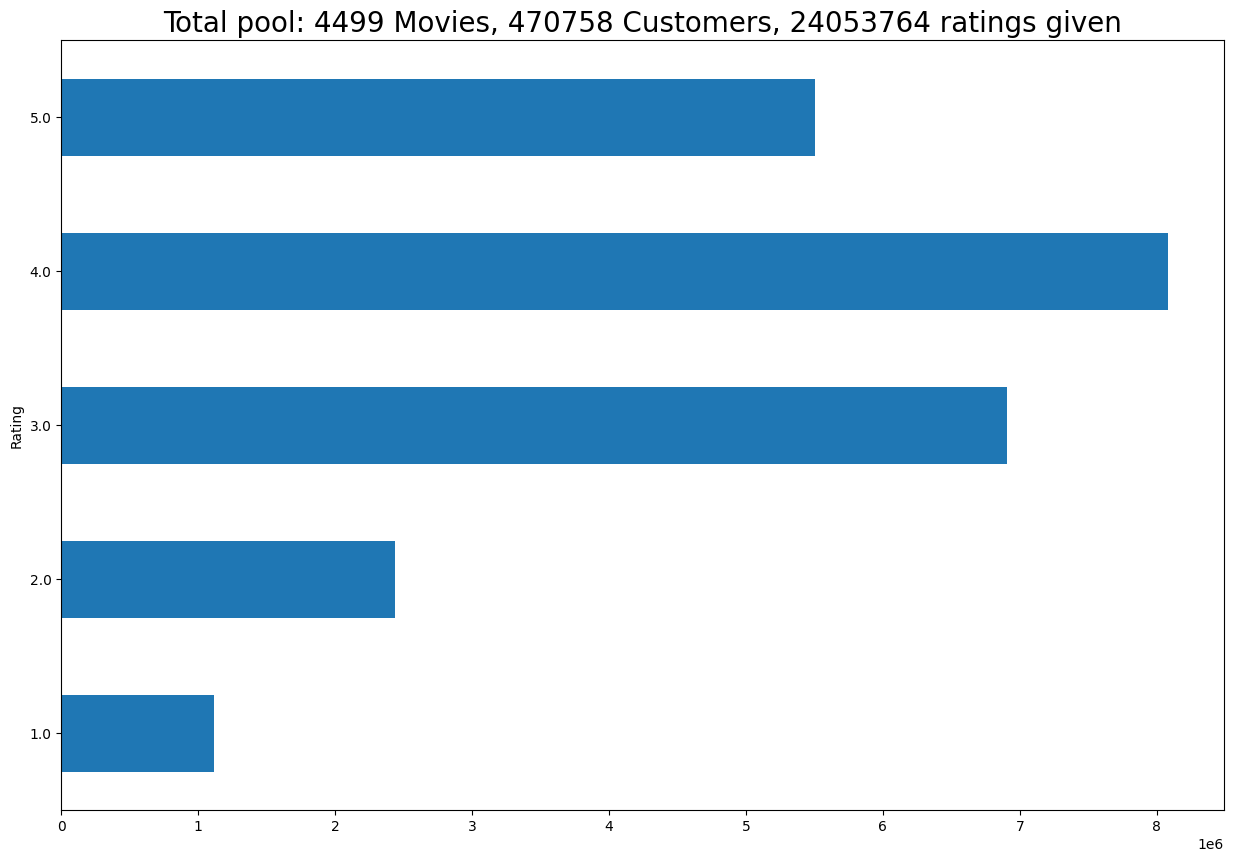

In [17]:
ax=stars.plot(kind='barh', legend =False, figsize=(15,10))
plt.title(f'Total pool: {movie_count} Movies, {customer_count} Customers, {rating_count} ratings given', fontsize=20)
plt.show()

In [18]:
#add the another column that will have movie id
#first of all we will be calculating how many null values we are having in the ratings column
df_Nan=pd.DataFrame(pd.isnull(df.Rating))
df_Nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [19]:
df_Nan =df_Nan[df_Nan['Rating']==True]
df_Nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [20]:
df_Nan.shape

(4499, 1)

In [21]:
df_Nan.head()

,Rating
0,True
548,True
694,True
2707,True
2850,True


In [22]:
df_Nan.tail()

,Rating
24046714,True
24047329,True
24056849,True
24057564,True
24057834,True


In [23]:
#now we will reset the index as the column
df_Nan = df_Nan.reset_index()
df_Nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [24]:
#now we will create a numpy array that will contain 1 from values 0 to 547, 2 from 549 to 693 and so on
movie_np= []
movie_id=1
for i, j in zip(df_Nan['index'][1:],df_Nan['index'][:-1]):
  temp=np.full((1, i-j-1), movie_id)
  movie_np=np.append(movie_np,temp)
  movie_id+=1
print(movie_np)

#account for last record and corresponding length
#numpy approach
last_record=np.full((1,len(df)-df_Nan.iloc[-1,0]-1),movie_id)#movie id will be 4499
movie_np=np.append(movie_np,last_record)

[1.000e+00 1.000e+00 1.000e+00 ... 4.498e+03 4.498e+03 4.498e+03]


In [25]:
   len(df)

24058263

In [26]:
df_Nan.iloc[-1,]

index     24057834
Rating        True
Name: 4498, dtype: object

In [27]:
df_Nan['index'][:-1]

0              0
1            548
2            694
3           2707
4           2850
          ...   
4493    24046583
4494    24046714
4495    24047329
4496    24056849
4497    24057564
Name: index, Length: 4498, dtype: int64

In [28]:
df_Nan['index'][1:]

1            548
2            694
3           2707
4           2850
5           3991
          ...   
4494    24046714
4495    24047329
4496    24056849
4497    24057564
4498    24057834
Name: index, Length: 4498, dtype: int64

In [29]:
ab=[df_Nan['index'][1:]-df_Nan['index'][:-1]]
ab

[0       NaN
 1       0.0
 2       0.0
 3       0.0
 4       0.0
        ... 
 4494    0.0
 4495    0.0
 4496    0.0
 4497    0.0
 4498    NaN
 Name: index, Length: 4499, dtype: float64]

In [30]:
df_Nan.iloc[-1,0]

24057834

In [31]:
24058263-24057834-1

428

In [32]:
tempp=np.full((1,547), 2) #(shape, fill_value)

In [33]:
print(tempp)

[[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [34]:
x=zip(df_Nan['index'][1:], df_Nan['index'][:-1])

In [35]:
tuple(x)

((548, 0),
 (694, 548),
 (2707, 694),
 (2850, 2707),
 (3991, 2850),
 (5011, 3991),
 (5105, 5011),
 (20016, 5105),
 (20112, 20016),
 (20362, 20112),
 (20561, 20362),
 (21108, 20561),
 (21234, 21108),
 (21353, 21234),
 (21644, 21353),
 (24344, 21644),
 (31453, 24344),
 (42176, 31453),
 (42716, 42176),
 (42833, 42716),
 (43052, 42833),
 (43256, 43052),
 (43872, 43256),
 (45206, 43872),
 (46414, 45206),
 (52276, 46414),
 (52550, 52276),
 (92303, 52550),
 (92827, 92303),
 (211241, 92827),
 (211463, 211241),
 (213318, 211463),
 (220209, 213318),
 (220318, 220209),
 (221158, 220318),
 (222098, 221158),
 (222380, 222098),
 (223183, 222380),
 (223936, 223183),
 (224428, 223936),
 (224522, 224428),
 (224651, 224522),
 (224757, 224651),
 (233259, 224757),
 (235879, 233259),
 (242438, 235879),
 (244789, 242438),
 (248381, 244789),
 (248613, 248381),
 (248942, 248613),
 (249033, 248942),
 (254181, 249033),
 (254296, 254181),
 (254456, 254296),
 (256863, 254456),
 (258697, 256863),
 (262260, 258697)

In [36]:
548-0-1

547

In [37]:
694-548-1

145

In [38]:
 temppp=np.full((1, 694-548-1), 2)
 temppp

array([[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]])

In [39]:
694-548

146

In [40]:
movie_np[-429:-2]

array([4498., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499.,

In [41]:
movie_np[-20:-1]

array([4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499., 4499.,
       4499.])

In [42]:
last_record

array([[4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499, 4499,
        4499, 4499, 4499, 4499, 4499, 

In [43]:
len(movie_np)

24053764

In [44]:
df= df[pd.notnull(df['Rating'])]

df['Movie_Id']=movie_np.astype(int)
df['Cust_Id']=df['Cust_Id'].astype(int)
print("Now the dataset will look like")
df

Now the dataset will look like


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


In [45]:
#now we will remove all the users that have rated less movies and
#also those movies that has been rated less in numbers

In [46]:
f=['count','mean']

In [47]:
dataset_movie_summary=df.groupby('Movie_Id').agg(f)

In [48]:
dataset_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [49]:
dataset_movie_summary=df.groupby('Movie_Id')['Rating'].agg(['count'])
dataset_movie_summary

,count
Movie_Id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [50]:
dataset_movie_summary["count"].quantile(0.7)

1798.6

In [51]:
movie_benchmark=round(dataset_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [52]:
dataset_movie_summary["count"]

Movie_Id
1        547
2        145
3       2012
4        142
5       1140
        ... 
4495     614
4496    9519
4497     714
4498     269
4499     428
Name: count, Length: 4499, dtype: int64

In [53]:
drop_movie_list=dataset_movie_summary[dataset_movie_summary["count"]<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_Id', length=3149)

In [54]:
#now we will remove all the users that are in-active
dataset_cust_summary=df.groupby('Cust_Id')['Rating'].agg(['count'])
dataset_cust_summary

,count
Cust_Id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


In [55]:
cust_benchmark=round(dataset_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [56]:
drop_cust_list = dataset_cust_summary[dataset_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int64', name='Cust_Id', length=327300)

In [57]:
#we will remove all the customers and movies that are below the benchmark
df.shape

(24053764, 3)

In [58]:
df['Movie_Id'].isin(drop_movie_list)

1           True
2           True
3           True
4           True
5           True
            ... 
24058258    True
24058259    True
24058260    True
24058261    True
24058262    True
Name: Movie_Id, Length: 24053764, dtype: bool

In [59]:
df=df[~df['Movie_Id'].isin(drop_movie_list)]
df.shape

(22629885, 3)

In [60]:
df=df[~df['Cust_Id'].isin(drop_cust_list)]
df.shape

(17337458, 3)

In [61]:
print('After the triming, the shape is: {}'.format(df.shape))

After the triming, the shape is: (17337458, 3)


In [62]:
df.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


In [63]:
df_title = pd.read_csv("/content/drive/MyDrive/movie_titles (1).csv",  encoding='ISO-8859-1', header=None, usecols=[0,1,2], names=['Movie_Id','Year','Name' ])

df_title.set_index('Movie_Id', inplace=True)

In [64]:
df_title.head(10)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [65]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [66]:
df_title.iloc[:4499,:]

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
4495,2002.0,Clifford: Happy Birthday Clifford / Puppy Love
4496,1993.0,Farewell My Concubine
4497,1990.0,Texasville


In [67]:
!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357242 sha256=bcb5cf321aecfdafb60d2e17899717ae71f5bb458c65e0bc3a67dc86817f24f4
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [68]:
#model building

import math
import seaborn as sns
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate

In [69]:
#helps us to read the dataset for algo
reader=Reader()

In [70]:
#we only work with top 100k rows for quick runtime
data=Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']][:100000],reader)

In [71]:
data

In [72]:
model=SVD()
# cross_validate(svd, data, measures=['RMSE','MAE'], cv=3)
#for 1st fold- 1,2,3,4,5

In [73]:
cross_validate(model, data, measures=['RMSE','MAE'], cv=4)

{'test_rmse': array([1.00343977, 0.99950966, 0.99673146, 0.99320336]),
 'test_mae': array([0.80116408, 0.8021537 , 0.79994085, 0.79549208]),
 'fit_time': (2.7965383529663086,
  1.7411248683929443,
  1.8095066547393799,
  1.7698140144348145),
 'test_time': (0.2379317283630371,
  0.14000773429870605,
  0.28296351432800293,
  0.32626938819885254)}

In [77]:
#so first we take user 1331155 and we try to recommend some movies based on the past data
#He rated so many movies with 5 *
dataset_1331155=df[(df['Cust_Id']==1331155)&(df['Rating']==5)]
dataset_1331155

,Cust_Id,Rating,Movie_Id
149444,1331155,5.0,30
2425290,1331155,5.0,457
2699612,1331155,5.0,483
2991692,1331155,5.0,563
3264278,1331155,5.0,607
4421101,1331155,5.0,862
7368403,1331155,5.0,1470
8454460,1331155,5.0,1692
8737378,1331155,5.0,1744
9781670,1331155,5.0,1905


In [76]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [78]:
#now we will build the recommendation algorithm
#first we will make a shallow copy of the movie_titles.csv file so that we can change
#the values in the copied dataset, not in the actual dataset
user_1331155=df_title.copy()
user_1331155

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [79]:
user_1331155=user_1331155.reset_index()
user_1331155

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [80]:
user_1331155=user_1331155[~user_1331155['Movie_Id'].isin(drop_movie_list)]
user_1331155

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [81]:
user_1331155['Estimate_score']=user_1331155['Movie_Id'].apply(lambda x: model.predict(1331155, x).est)
#user_712664=user_712664.drop('Movie_Id', axis=1)

In [82]:
user_1331155

,Movie_Id,Year,Name,Estimate_score
2,3,1997.0,Character,3.699339
7,8,2004.0,What the #$*! Do We Know!?,3.168912
15,16,1996.0,Screamers,3.153091
16,17,2005.0,7 Seconds,2.901617
17,18,1994.0,Immortal Beloved,3.859482
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.601227
17766,17767,2004.0,Fidel Castro: American Experience,3.601227
17767,17768,2000.0,Epoch,3.601227
17768,17769,2003.0,The Company,3.601227


In [83]:
user_1331155=user_1331155.sort_values('Estimate_score',ascending=False)
print(user_1331155)

       Movie_Id    Year                        Name  Estimate_score
17           18  1994.0            Immortal Beloved        3.859482
27           28  2002.0             Lilo and Stitch        3.790729
29           30  2003.0      Something's Gotta Give        3.748440
2             3  1997.0                   Character        3.699339
12895     12896  1994.0       Bullets Over Broadway        3.601227
...         ...     ...                         ...             ...
17769     17770  2003.0                Alien Hunter        3.601227
7             8  2004.0  What the #$*! Do We Know!?        3.168912
15           16  1996.0                   Screamers        3.153091
16           17  2005.0                   7 Seconds        2.901617
25           26  2004.0             Never Die Alone        2.829482

[14621 rows x 4 columns]
